In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

In [2]:
def lorenz_system(t, state, sigma, rho, beta):
  x, y, z = state
  dx = sigma * (y - x)
  dy = x * (rho - z) - y
  dz = x * y - beta * z
  return [dx, dy, dz]

def solve_differential_equation(sigma, rho, beta, x0=0.0, y0=1.0, z0=1.05, t_max=40.0, dt=0.01):
  t_span = [0, t_max]
  t_eval = np.arange(0, t_max, dt)

  sol = solve_ivp(
    fun=lorenz_system,
    t_span=t_span,
    y0=[x0, y0, z0],
    method="RK45",
    t_eval=t_eval,
    args=(sigma, rho, beta),
  )

  x_sol = sol.y[0, :]
  y_sol = sol.y[1, :]
  z_sol = sol.y[2, :]

  return x_sol, y_sol, z_sol

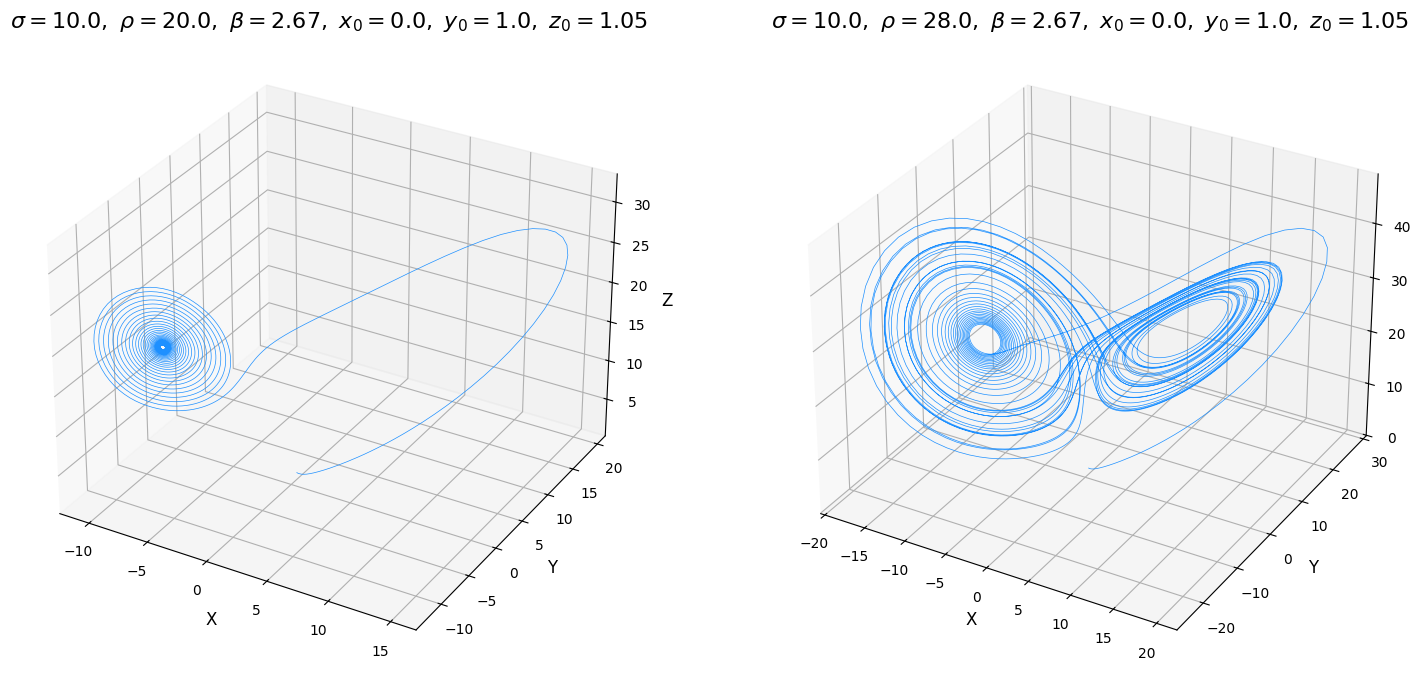

In [3]:
sigma = 10.0
rhos = [20.0, 28.0]
beta = 8.0 / 3.0

x0, y0, z0 = 0.0, 1.0, 1.05

fig = plt.figure(figsize=(18, 10))

for i, rho in enumerate(rhos):
  x_sol, y_sol, z_sol = solve_differential_equation(sigma, rho, beta, x0=x0, y0=y0, z0=z0)

  ax = fig.add_subplot(1, 2, i + 1, projection="3d")

  ax.plot(x_sol, y_sol, z_sol, lw=0.5, color='dodgerblue')

  ax.set_title(rf"$\sigma={{{sigma}}}, \ \rho={{{rho}}}, \ \beta={{{beta:.2f}}}, \ x_0={{{x0}}}, \ y_0={{{y0}}}, \ z_0={{{z0}}}$",
              fontsize=16)
  ax.set_xlabel("X", fontsize=12)
  ax.set_ylabel("Y", fontsize=12)
  ax.set_zlabel("Z", fontsize=12)

plt.grid(True)
plt.show()